In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
house_price = pd.read_csv('train.csv')

In [3]:
house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
cols_with_missing = [col for col in house_price.columns if house_price[col].isnull().any()]

In [5]:
type(cols_with_missing)
print(cols_with_missing)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [6]:
house_price['LotFrontage'].isnull().value_counts()

False    1201
True      259
Name: LotFrontage, dtype: int64

In [7]:
for col in cols_with_missing:
    print(col)
    print(house_price[col].isnull().value_counts())

LotFrontage
False    1201
True      259
Name: LotFrontage, dtype: int64
Alley
True     1369
False      91
Name: Alley, dtype: int64
MasVnrType
False    1452
True        8
Name: MasVnrType, dtype: int64
MasVnrArea
False    1452
True        8
Name: MasVnrArea, dtype: int64
BsmtQual
False    1423
True       37
Name: BsmtQual, dtype: int64
BsmtCond
False    1423
True       37
Name: BsmtCond, dtype: int64
BsmtExposure
False    1422
True       38
Name: BsmtExposure, dtype: int64
BsmtFinType1
False    1423
True       37
Name: BsmtFinType1, dtype: int64
BsmtFinType2
False    1422
True       38
Name: BsmtFinType2, dtype: int64
Electrical
False    1459
True        1
Name: Electrical, dtype: int64
FireplaceQu
False    770
True     690
Name: FireplaceQu, dtype: int64
GarageType
False    1379
True       81
Name: GarageType, dtype: int64
GarageYrBlt
False    1379
True       81
Name: GarageYrBlt, dtype: int64
GarageFinish
False    1379
True       81
Name: GarageFinish, dtype: int64
GarageQual
False  

In [8]:
updated_house_price = house_price.drop(cols_with_missing,axis=1)

In [9]:
updated_house_price.head(2)

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0   1          60       RL     8450   Pave      Reg         Lvl    AllPub   
1   2          20       RL     9600   Pave      Reg         Lvl    AllPub   

  LotConfig LandSlope    ...    EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    Inside       Gtl    ...                0         0           0        0   
1       FR2       Gtl    ...                0         0           0        0   

  MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0       0       2    2008        WD         Normal    208500  
1       0       5    2007        WD         Normal    181500  

[2 rows x 62 columns]

In [18]:
#updated_house_price.info()

In [11]:
objects_for_OHE = updated_house_price.select_dtypes(include=['object'])

In [12]:
for col in objects_for_OHE:
    print(col)
    print(objects_for_OHE[col].value_counts())

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste  

In [13]:
Only_numeric  = updated_house_price.select_dtypes(exclude=['object'])

In [14]:
Only_numeric.drop(columns='Id',axis=1,inplace=True)

/home/prateek/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
Only_numeric.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

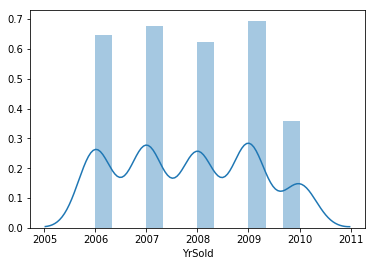

In [76]:
sns.distplot(Only_numeric['YrSold'])

In [79]:
Only_numeric['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

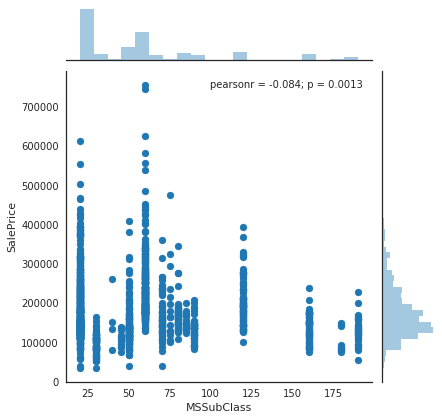

In [85]:
sns.set_style('white')
sns.set_context(context='notebook')
sns.jointplot(x='MSSubClass',y='SalePrice',data=Only_numeric,kind='scatter')

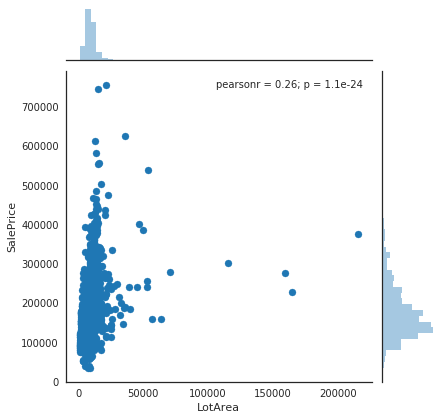

In [86]:
sns.jointplot(x='LotArea',y='SalePrice',data=Only_numeric,kind='scatter')

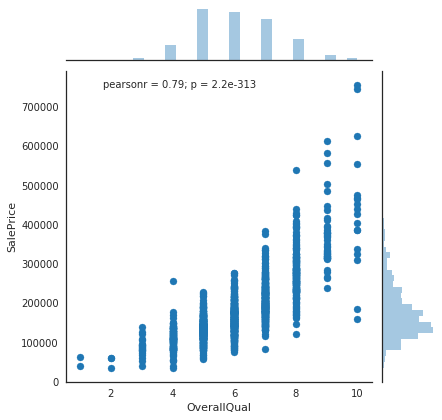

In [87]:
sns.jointplot(x='OverallQual',y='SalePrice',data=Only_numeric,kind='scatter')

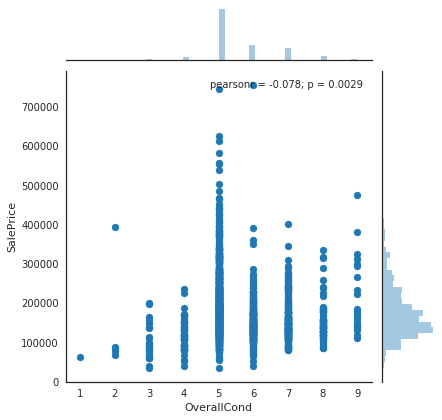

In [88]:
sns.jointplot(x='OverallCond',y='SalePrice',data=Only_numeric,kind='scatter')

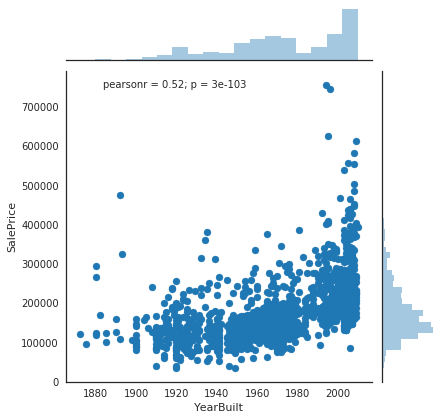

In [89]:
sns.jointplot(x='YearBuilt',y='SalePrice',data=Only_numeric,kind='scatter')

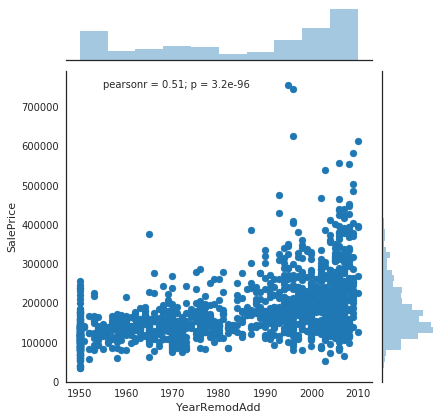

In [90]:
sns.jointplot(x='YearRemodAdd',y='SalePrice',data=Only_numeric,kind='scatter')

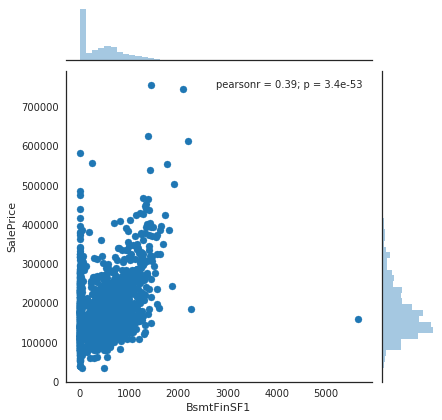

In [91]:
sns.jointplot(x='BsmtFinSF1',y='SalePrice',data=Only_numeric,kind='scatter')

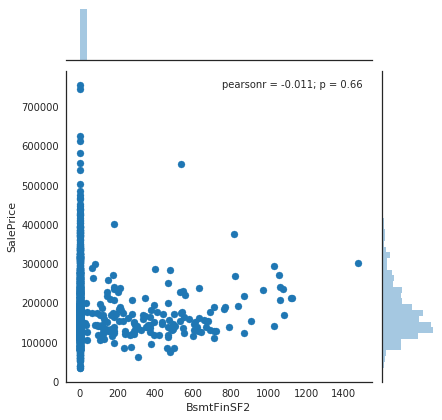

In [92]:
sns.jointplot(x='BsmtFinSF2',y='SalePrice',data=Only_numeric,kind='scatter')

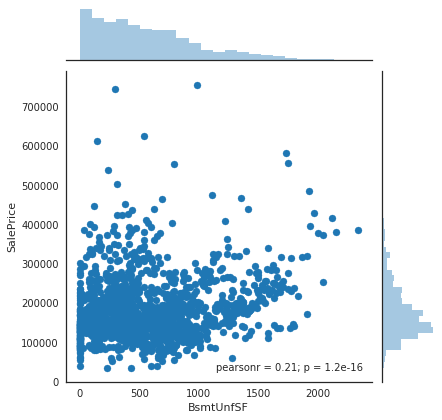

In [93]:
#BsmtUnfSF
sns.jointplot(x='BsmtUnfSF',y='SalePrice',data=Only_numeric,kind='scatter')

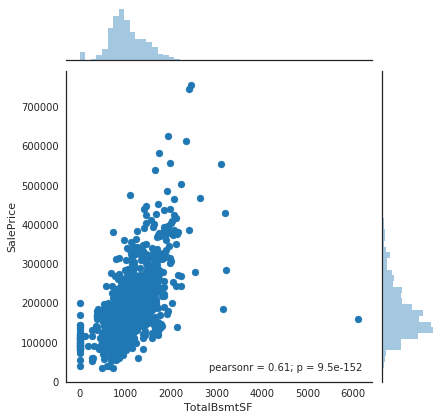

In [94]:
#TotalBsmtSF
sns.jointplot(x='TotalBsmtSF',y='SalePrice',data=Only_numeric,kind='scatter')

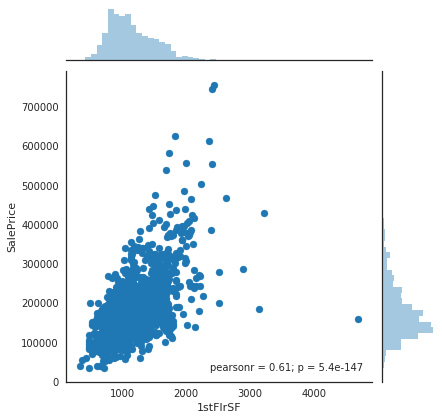

In [95]:
#1stFlrSF
sns.jointplot(x='1stFlrSF',y='SalePrice',data=Only_numeric,kind='scatter')

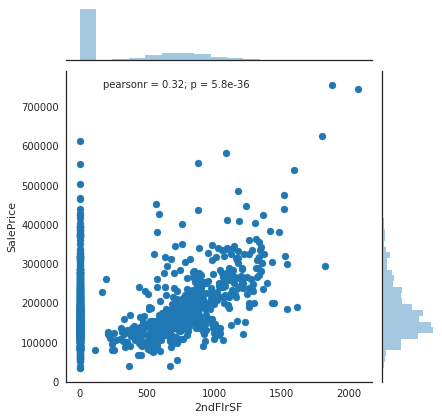

In [96]:
#2ndFlrSF
sns.jointplot(x='2ndFlrSF',y='SalePrice',data=Only_numeric,kind='scatter')

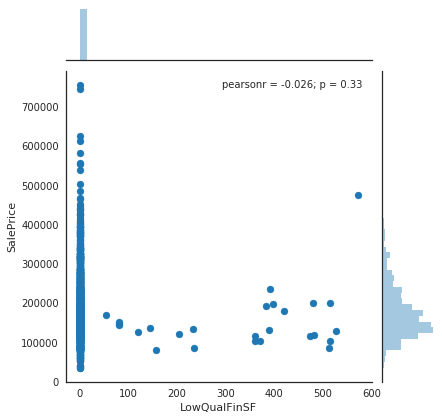

In [97]:
#LowQualFinSF
sns.jointplot(x='LowQualFinSF',y='SalePrice',data=Only_numeric,kind='scatter')

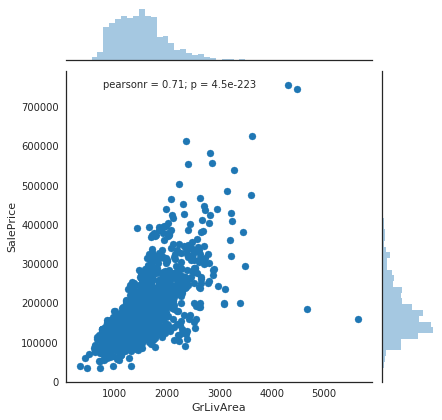

In [98]:
#GrLivArea
sns.jointplot(x='GrLivArea',y='SalePrice',data=Only_numeric,kind='scatter')

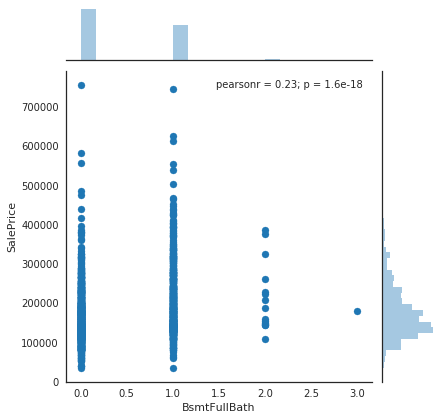

In [99]:
#BsmtFullBath
sns.jointplot(x='BsmtFullBath',y='SalePrice',data=Only_numeric,kind='scatter')

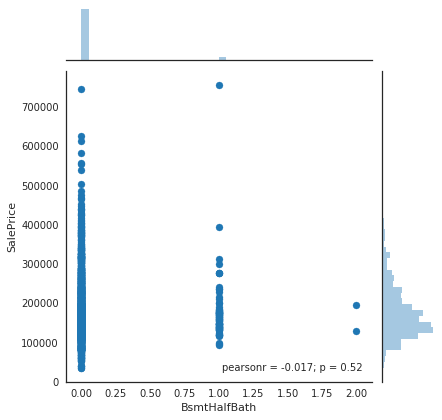

In [100]:
#BsmtHalfBath
sns.jointplot(x='BsmtHalfBath',y='SalePrice',data=Only_numeric,kind='scatter')

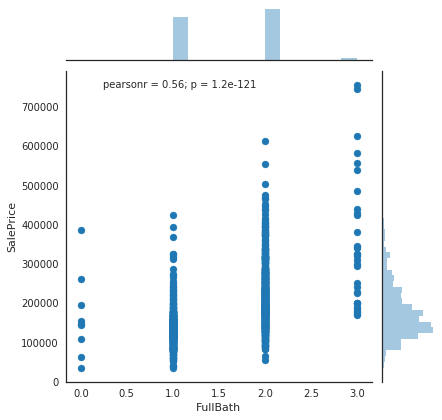

In [101]:
#FullBath
sns.jointplot(x='FullBath',y='SalePrice',data=Only_numeric,kind='scatter')

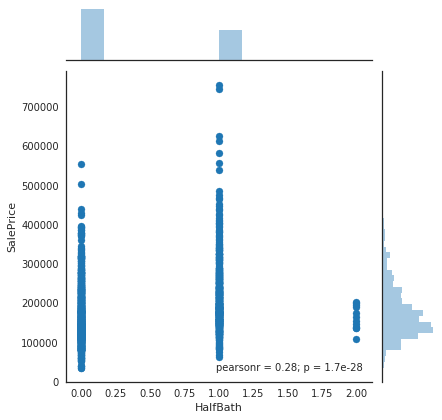

In [102]:
#HalfBath
sns.jointplot(x='HalfBath',y='SalePrice',data=Only_numeric,kind='scatter')

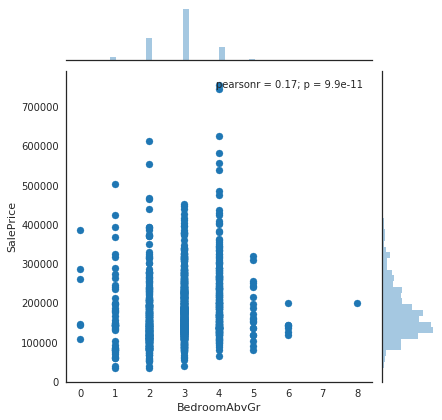

In [103]:
#BedroomAbvGr
sns.jointplot(x='BedroomAbvGr',y='SalePrice',data=Only_numeric,kind='scatter')

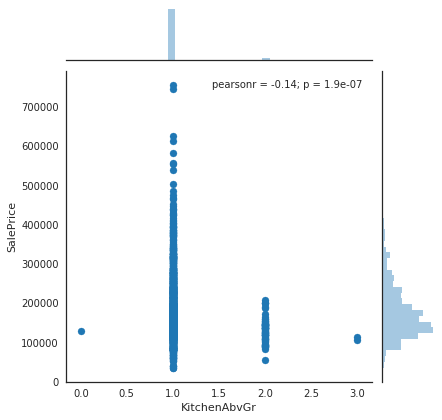

In [104]:
#KitchenAbvGr
sns.jointplot(x='KitchenAbvGr',y='SalePrice',data=Only_numeric,kind='scatter')

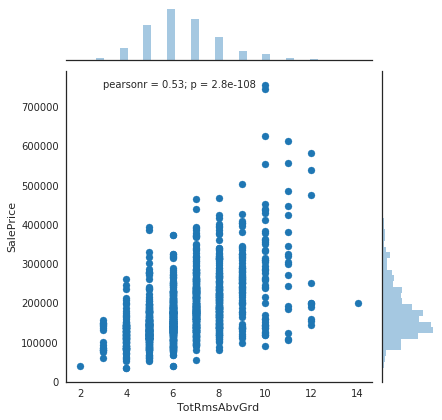

In [105]:
#TotRmsAbvGrd
sns.jointplot(x='TotRmsAbvGrd',y='SalePrice',data=Only_numeric,kind='scatter')

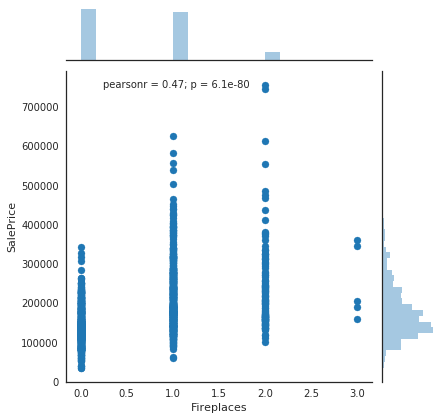

In [106]:
#Fireplaces
sns.jointplot(x='Fireplaces',y='SalePrice',data=Only_numeric,kind='scatter')

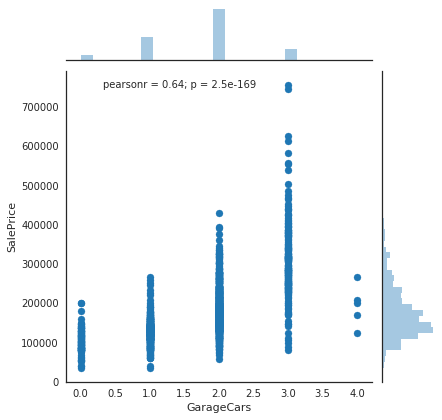

In [107]:
#GarageCars
sns.jointplot(x='GarageCars',y='SalePrice',data=Only_numeric,kind='scatter')

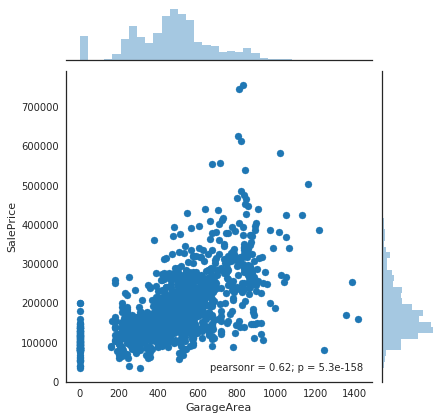

In [108]:
#GarageArea
sns.jointplot(x='GarageArea',y='SalePrice',data=Only_numeric,kind='scatter')

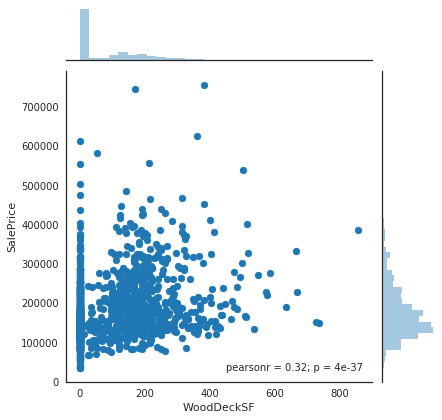

In [109]:
#WoodDeckSF
sns.jointplot(x='WoodDeckSF',y='SalePrice',data=Only_numeric,kind='scatter')

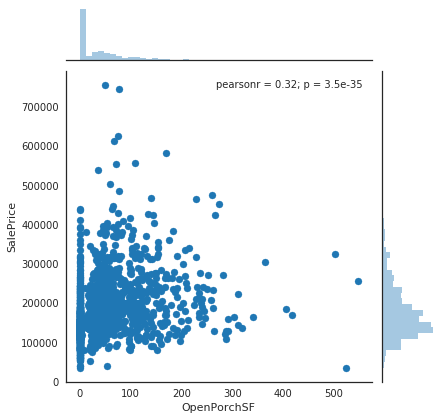

In [110]:
#OpenPorchSF
sns.jointplot(x='OpenPorchSF',y='SalePrice',data=Only_numeric,kind='scatter')

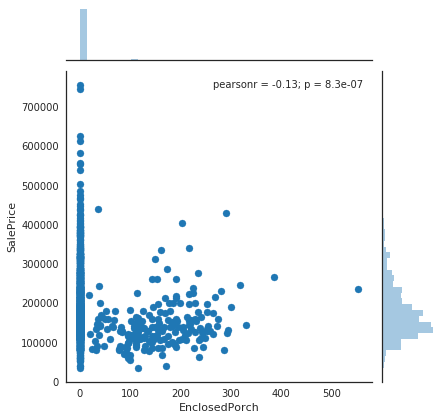

In [111]:
#EnclosedPorch
sns.jointplot(x='EnclosedPorch',y='SalePrice',data=Only_numeric,kind='scatter')

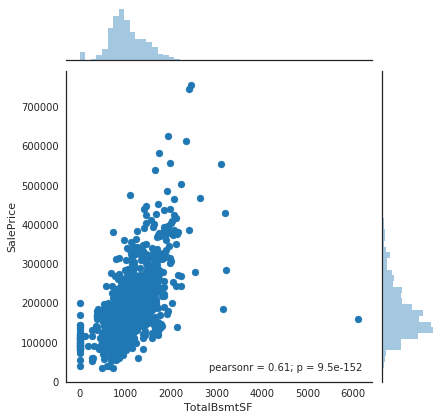

In [112]:
#3SsnPorch
sns.jointplot(x='TotalBsmtSF',y='SalePrice',data=Only_numeric,kind='scatter')

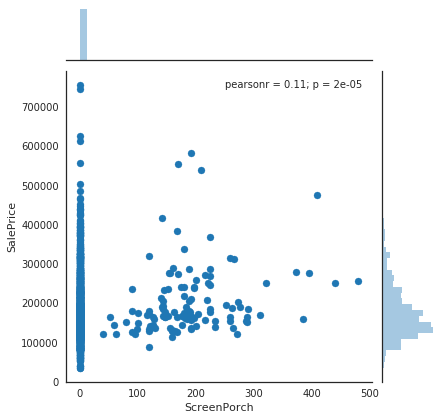

In [113]:
#ScreenPorch
sns.jointplot(x='ScreenPorch',y='SalePrice',data=Only_numeric,kind='scatter')

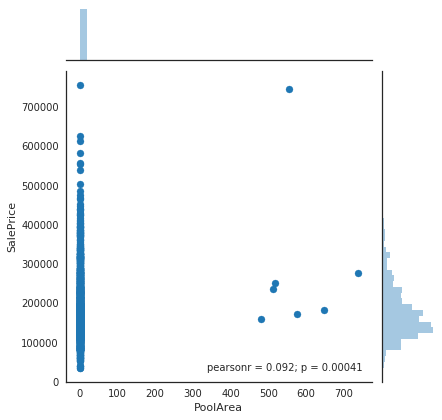

In [114]:
#PoolArea
sns.jointplot(x='PoolArea',y='SalePrice',data=Only_numeric,kind='scatter')

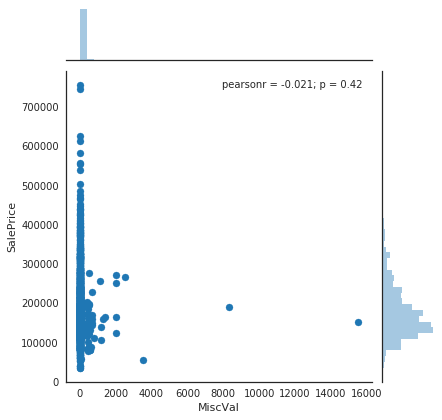

In [115]:
#MiscVal
sns.jointplot(x='MiscVal',y='SalePrice',data=Only_numeric,kind='scatter')

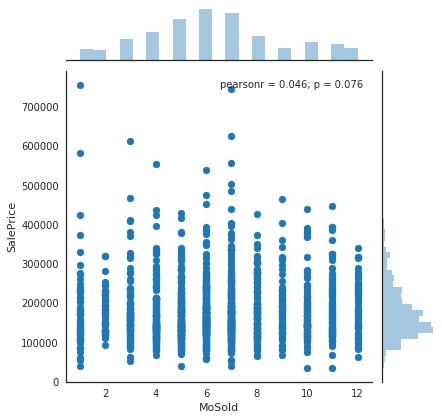

In [116]:
#MoSold
sns.jointplot(x='MoSold',y='SalePrice',data=Only_numeric,kind='scatter')

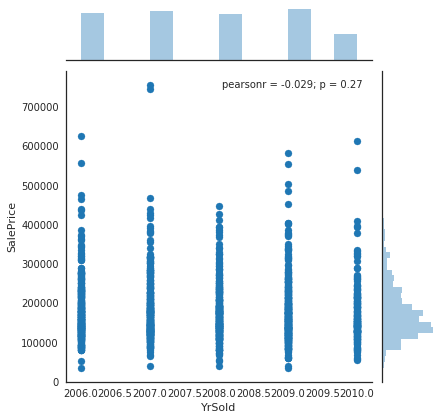

In [117]:
#YrSold
sns.jointplot(x='YrSold',y='SalePrice',data=Only_numeric,kind='scatter')

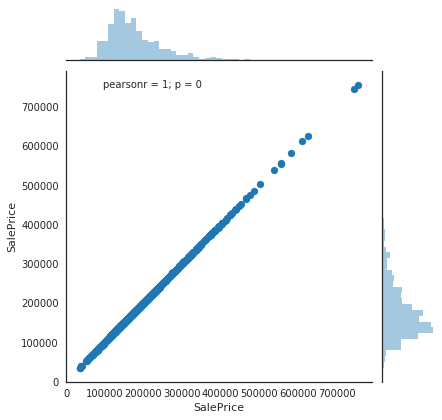

In [118]:
#SalePrice
sns.jointplot(x='SalePrice',y='SalePrice',data=Only_numeric,kind='scatter')

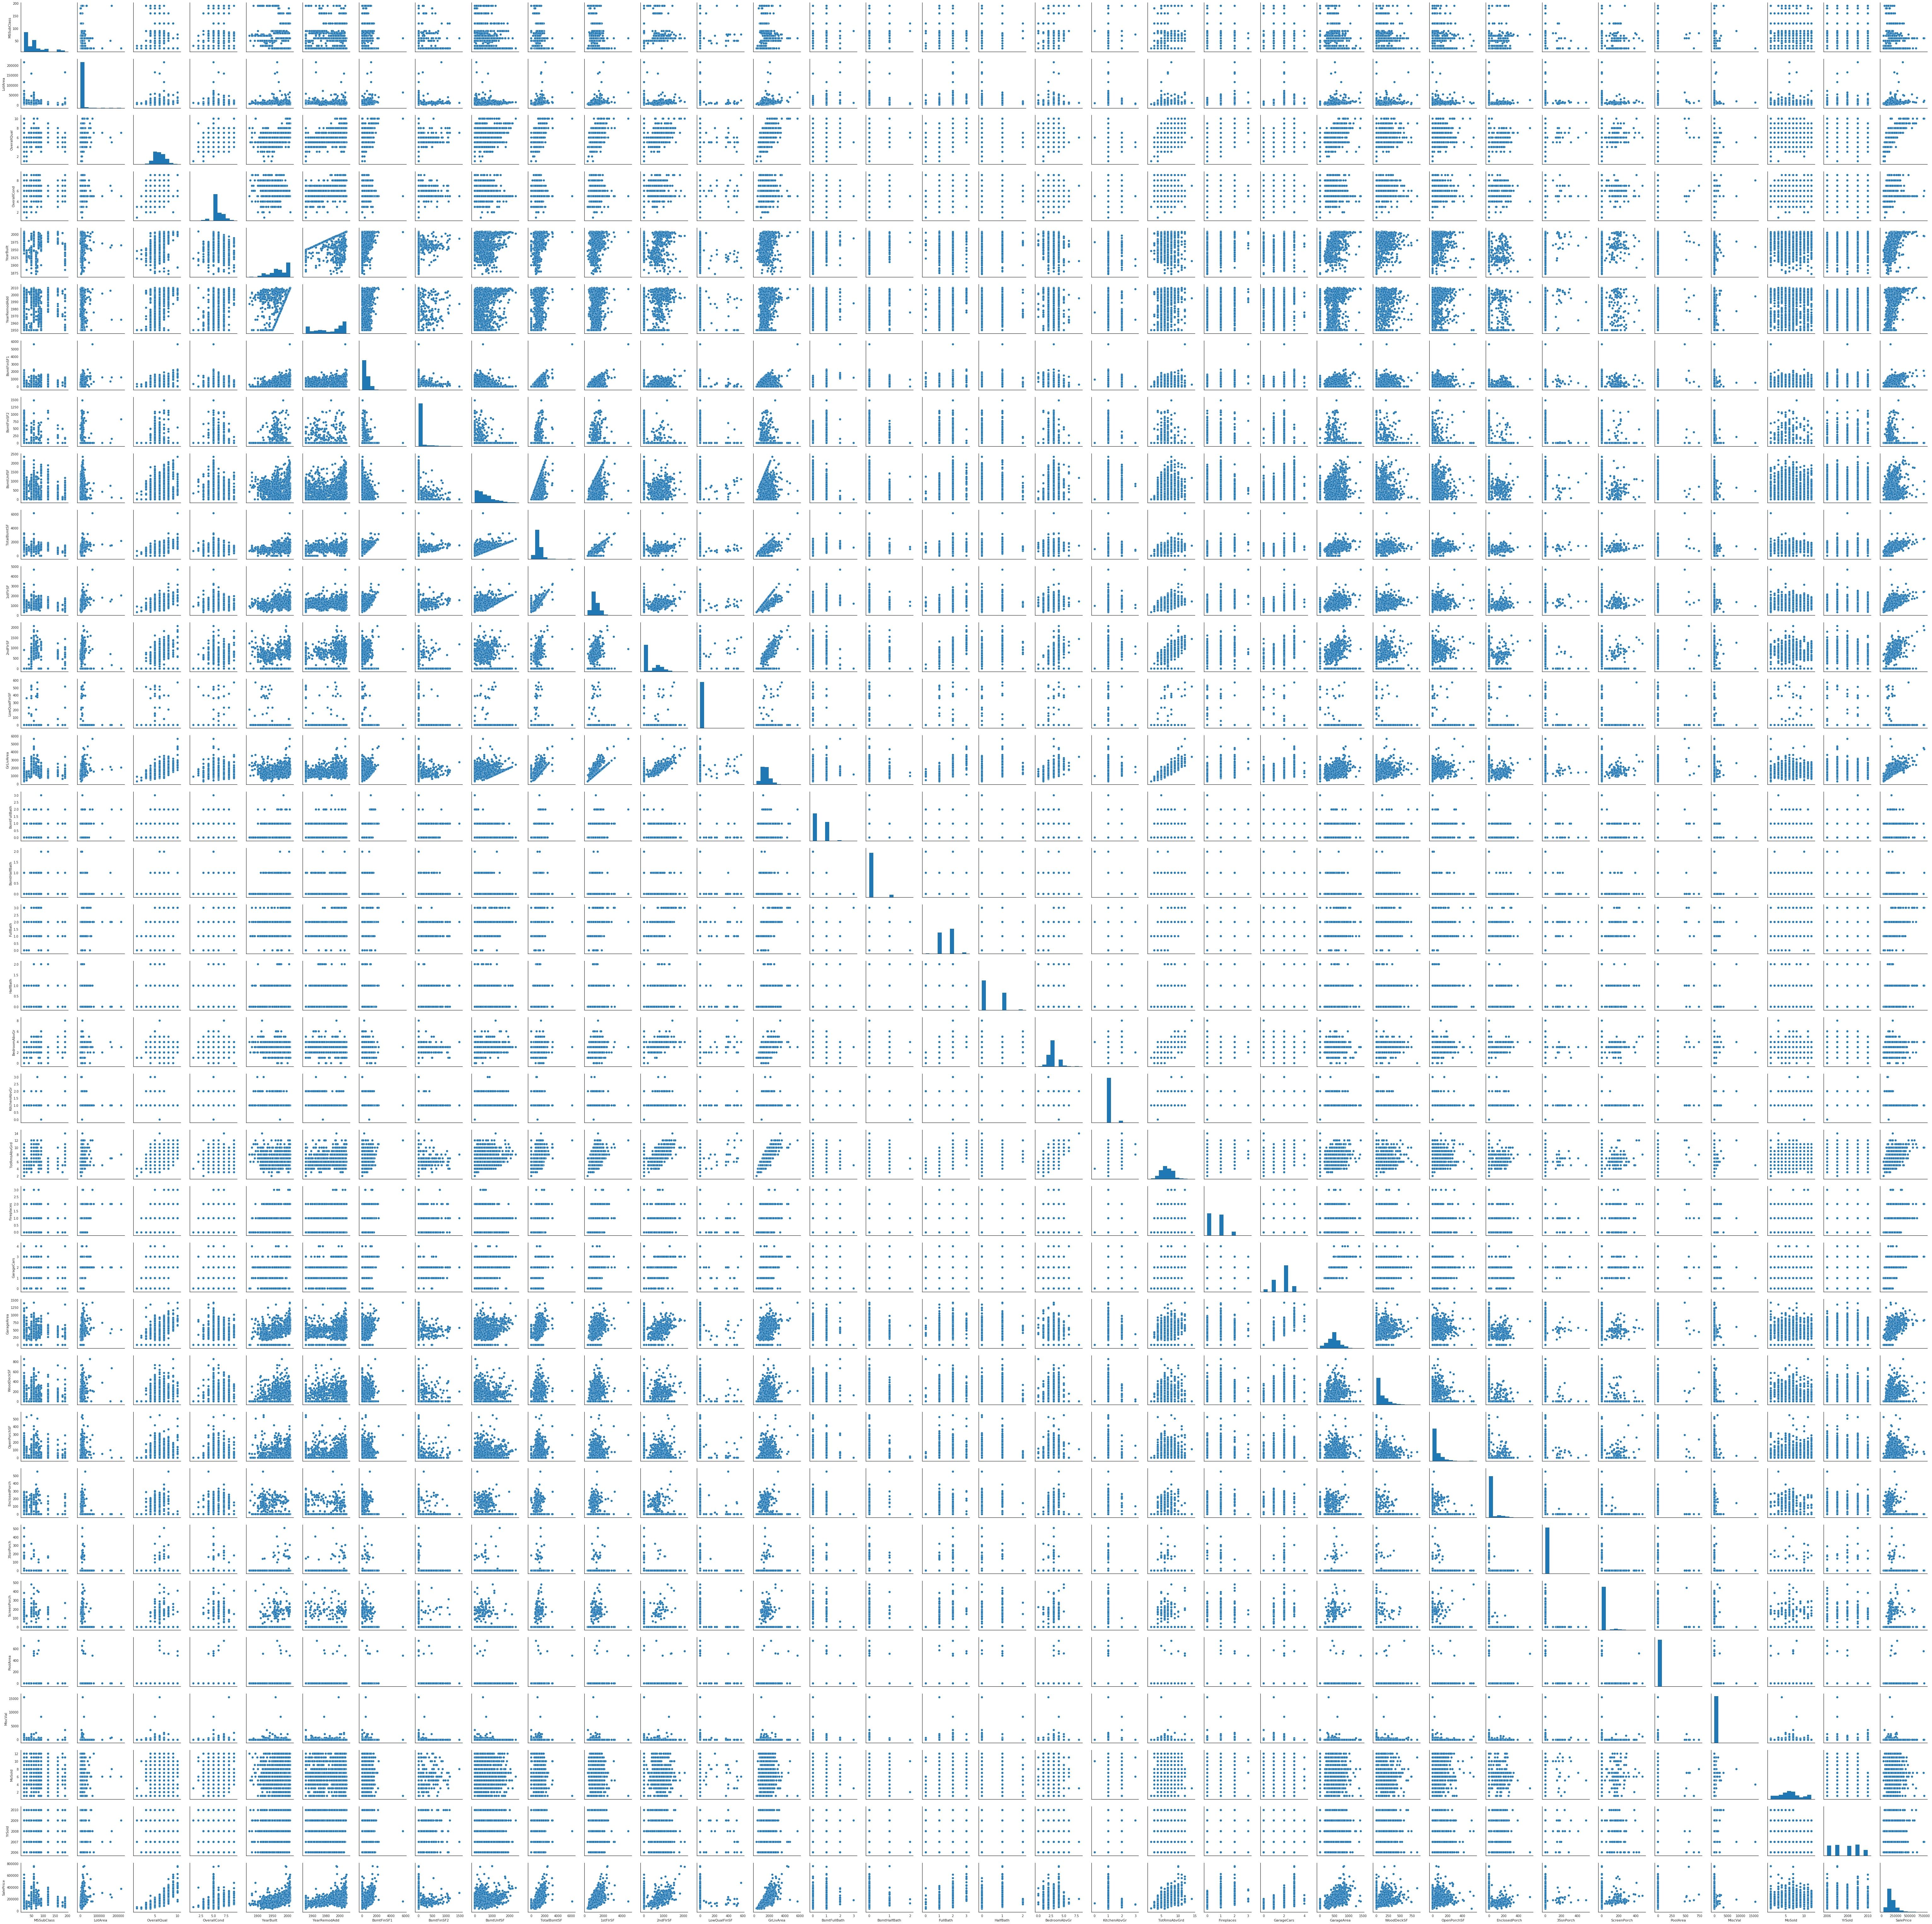

In [119]:
sns.pairplot(Only_numeric)

In [120]:
Only_numeric.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [126]:
X_train = Only_numeric.drop(columns=['SalePrice'],axis=1)

In [127]:
X_train.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [128]:
y_train = Only_numeric['SalePrice']

In [131]:
#y_train

In [133]:
from sklearn.ensemble import RandomForestRegressor

In [134]:
forest_model = RandomForestRegressor()

In [135]:
forest_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [234]:
new_data = pd.read_csv('test.csv')

In [163]:
new_data.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [158]:
new_data.drop(axis=1,inplace=True,columns=['Id','LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'])

In [160]:
new_data_cols_with_missing = [col for col in new_data.columns if new_data[col].isnull().any()]

In [161]:
new_data_cols_with_missing

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageCars',
 'GarageArea',
 'SaleType']

In [162]:
for col in new_data_cols_with_missing:
    print(col)
    print(new_data[col].isnull().value_counts())

MSZoning
False    1455
True        4
Name: MSZoning, dtype: int64
Utilities
False    1457
True        2
Name: Utilities, dtype: int64
Exterior1st
False    1458
True        1
Name: Exterior1st, dtype: int64
Exterior2nd
False    1458
True        1
Name: Exterior2nd, dtype: int64
BsmtFinSF1
False    1458
True        1
Name: BsmtFinSF1, dtype: int64
BsmtFinSF2
False    1458
True        1
Name: BsmtFinSF2, dtype: int64
BsmtUnfSF
False    1458
True        1
Name: BsmtUnfSF, dtype: int64
TotalBsmtSF
False    1458
True        1
Name: TotalBsmtSF, dtype: int64
BsmtFullBath
False    1457
True        2
Name: BsmtFullBath, dtype: int64
BsmtHalfBath
False    1457
True        2
Name: BsmtHalfBath, dtype: int64
KitchenQual
False    1458
True        1
Name: KitchenQual, dtype: int64
Functional
False    1457
True        2
Name: Functional, dtype: int64
GarageCars
False    1458
True        1
Name: GarageCars, dtype: int64
GarageArea
False    1458
True        1
Name: GarageArea, dtype: int64
SaleType
Fal

In [140]:
new_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [164]:
new_data_OHE = new_data.select_dtypes(include=['object'])

In [165]:
new_data_OHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 27 columns):
MSZoning         1455 non-null object
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non-null object
ExterQual        1459 non-null object
ExterCond        1459 non-null object
Foundation       1459 non-null object
Heating          1459 non-null object
HeatingQC        1459 non-null object
CentralAir       1459 non-null object
KitchenQual      1458 non-null object
Functional       14

In [166]:
X_test  = new_data.select_dtypes(exclude=['object'])

In [167]:
Only_numeric_missing = [col for col in X_test.columns if X_test[col].isnull().any()]



In [188]:
Only_numeric_missing

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea']

In [229]:
X_test['GarageCars'].isnull().sum()

0

In [225]:
X_test['GarageArea'].value_counts()
#for col in Only_numeric_missing:
#    print(col)
#    print(Only_numeric_missing[col].isnan().value_counts())

2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: GarageCars, dtype: int64

In [226]:
X_test['GarageArea'].describe()

count    1458.000000
mean        1.766118
std         0.775945
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

In [227]:
X_test['GarageArea'].fillna('2',inplace=True)

/home/prateek/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [230]:
#from sklearn.preprocessing import Imputer
#my_imputer = Imputer()
#imputed_X_test = my_imputer.transform(X_test)

In [231]:
X_test.isnull().sum()

MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [232]:
predictions = forest_model.predict(X_test)

In [233]:
print(predictions)

[123480.  151100.  191840.  ... 161100.  119200.  249181.6]


In [236]:
my_submission = pd.DataFrame({'Id': new_data.Id, 'SalePrice': predictions})

In [237]:
print(my_submission)

        Id  SalePrice
0     1461   123480.0
1     1462   151100.0
2     1463   191840.0
3     1464   182090.0
4     1465   199695.6
5     1466   181250.0
6     1467   160540.0
7     1468   178450.0
8     1469   187420.1
9     1470   121200.0
10    1471   193250.0
11    1472    89240.0
12    1473    89890.0
13    1474   151760.0
14    1475   140790.0
15    1476   367748.5
16    1477   253297.4
17    1478   301434.7
18    1479   213877.2
19    1480   491807.9
20    1481   329791.9
21    1482   198820.0
22    1483   174184.4
23    1484   181043.5
24    1485   181023.0
25    1486   209750.0
26    1487   354780.4
27    1488   225959.0
28    1489   223349.9
29    1490   192200.0
...    ...        ...
1429  2890    90790.0
1430  2891   135335.0
1431  2892    66770.0
1432  2893   119110.0
1433  2894    59570.0
1434  2895   295200.0
1435  2896   257000.0
1436  2897   187840.0
1437  2898   168677.0
1438  2899   232590.0
1439  2900   162140.0
1440  2901   207552.4
1441  2902   189055.0
1442  2903

In [238]:
my_submission.to_csv('submission.csv', index=False)